# ÖDEV5_EK

### SORU-1

### a)

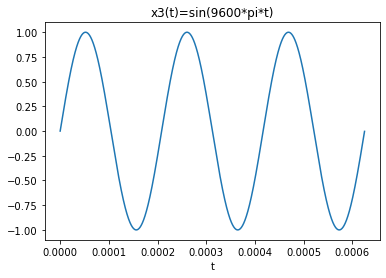

In [2]:
import matplotlib.pyplot as plt
import numpy as np

F=9600/2
T=1/F 
t=np.arange(0.,3*T,0.0000001)
x3=np.sin(9600*np.pi*t)

plt.figure()
plt.xlabel("t")
plt.title("x3(t)=sin(9600*pi*t)")
plt.plot(t,x3)
plt.show() 

### b)

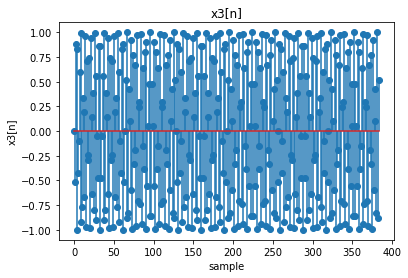

In [6]:
import matplotlib.pyplot as plt
import numpy as np

Fs=8192
Ts=1/Fs 
N=128
n=np.arange(0.,3*N)
x3=np.sin(9600*np.pi*n*Ts)

plt.figure()
plt.stem(n,x3)
plt.title("x3[n]")
plt.xlabel("sample")
plt.ylabel("x3[n]")
plt.show()

### c)

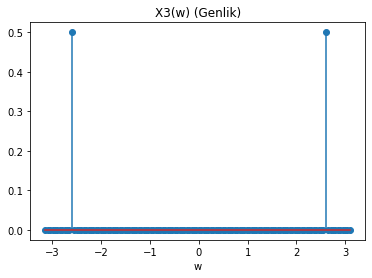

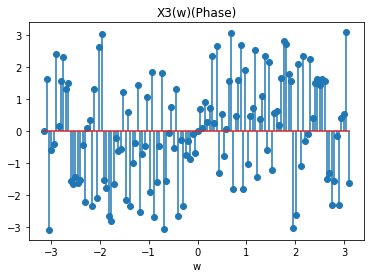

In [19]:
w=np.linspace(-np.pi,np.pi-(2*np.pi/N),N)
x3_w=np.fft.fft(x3,N)/N 
x3_w=np.fft.fftshift(x3_w)

plt.figure() 
plt.stem(w,np.abs(x3_w))
plt.title("X3(w) (Genlik)")
plt.xlabel("w")
plt.show()

plt.figure()
plt.stem(w,np.angle(x3_w))
plt.title("X3(w)(Phase)")
plt.xlabel("w")
plt.show()

### d)

A=1/2 ve B=5/2 bulundu.

### e)

<StemContainer object of 3 artists>

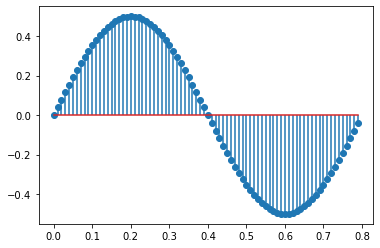

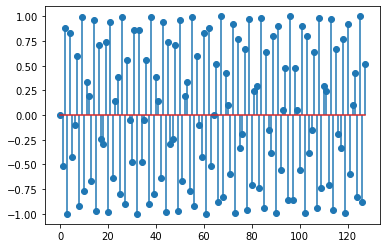

In [23]:
n = np.arange(0,4/5,0.01)
x4 = 1/2 * np.sin(5*np.pi*n/2)
plt.figure()
plt.stem(n,x4)

n=np.arange(0.,128)
x3=np.sin(9600*np.pi*n*Ts)
plt.figure()
plt.stem(n,x3)

### SORU-2

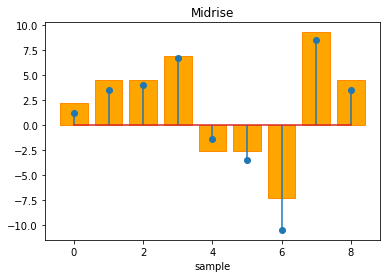

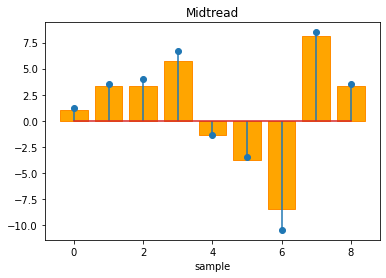

In [26]:
import matplotlib.pyplot as plt
import numpy as np

xn=np.array([125/100,35/10,4,67/10,-14/10,-35/10,-105/10,85/10,35/10])
n=np.arange(0.,9)


def quantize(x, S):
    X = x.reshape((-1,1))
    S = S.reshape((1,-1))
    dists = abs(X-S)
    nearestIndex = dists.argmin(axis=1)
    quantized = S.flat[nearestIndex]
    return quantized.reshape(x.shape)


k_bit= 3
Max_range= np.amax(xn)-np.amin(xn) # işaretin y ekseninde aldığı max değer aralığı
q=pow(2,k_bit) # seviye sayısı
delta = Max_range/q 

S_midrise = -np.amax(xn) + delta/2 + np.arange(q)*delta # mid-rise yöntemi için formül
S_midtread = -np.amax(xn) + np.arange(q)*delta # mid-tread yöntemi için formül


y_midtrise = quantize(xn, S_midrise) # mid-rise yöntemi ile kuantalanmış değerler
y_midtread = quantize(xn, S_midtread) # mid-tread yöntemi ile kuantalanmış değerler


fig, ax = plt.subplots()
ax.stem(n,xn) # x[n] işaretinin grafiğinin çizdirilmesi
ax.bar(n,y_midtrise,color='orange',edgecolor = "darkorange") # kuantalanmış işaretin grafiğinin çizdirilmes
plt.xlabel("sample") # grafiğin x ekseninin isimlendirilmesi
plt.title('Midrise')

fig, ax = plt.subplots()
ax.stem(n,xn) # x[n] işaretinin grafiğinin çizdirilmesi
ax.bar(n,y_midtread,color='orange',edgecolor = "darkorange") # kuantalanmış işaretin grafiğinin çizdirilmes
plt.xlabel("sample") # grafiğin x ekseninin isimlendirilmesi
plt.title('Midtread')
plt.show() # grafiklerin gösterilmesi